In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1
a) Load house sales data from file kc_house_data.csv, print first records.  
b) Print the variable list. Select categorical and numerical variables.  
c) Compute basic statistics of numerical variables. Are all of them meaningful?

In [8]:


df = pd.read_csv("kc_house_data.csv")

print(df.head())




           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [87]:
#b) 

categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

categorical_columns += ['condition','grade', 'zipcode', 'waterfront', 'view']

numerical_columns = [col for col in df.select_dtypes(include=['number']).columns if col not in categorical_columns]

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)


Categorical columns: ['date', 'condition', 'grade', 'zipcode', 'waterfront', 'view']
Numerical columns: ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [88]:
#c)
#Your code:
basic_statistics = {}

for col in numerical_columns:
    basic_statistics[col] = {
        'mean': df[col].mean(),
        'std': df[col].std(),
        'min': df[col].min(),
        'max': df[col].max(), 
        'sum': df[col].sum(),
    }

basic_statistics_df = pd.DataFrame(basic_statistics)
basic_statistics_df = basic_statistics_df.T

print(basic_statistics_df)

#Hint: Function describe()

                       mean           std           min           max  \
id             4.580302e+09  2.876566e+09  1.000102e+06  9.900000e+09   
price          5.400881e+05  3.671272e+05  7.500000e+04  7.700000e+06   
bedrooms       3.370842e+00  9.300618e-01  0.000000e+00  3.300000e+01   
bathrooms      2.114757e+00  7.701632e-01  0.000000e+00  8.000000e+00   
sqft_living    2.079900e+03  9.184409e+02  2.900000e+02  1.354000e+04   
sqft_lot       1.510697e+04  4.142051e+04  5.200000e+02  1.651359e+06   
floors         1.494309e+00  5.399889e-01  1.000000e+00  3.500000e+00   
sqft_above     1.788391e+03  8.280910e+02  2.900000e+02  9.410000e+03   
sqft_basement  2.915090e+02  4.425750e+02  0.000000e+00  4.820000e+03   
yr_built       1.971005e+03  2.937341e+01  1.900000e+03  2.015000e+03   
yr_renovated   8.440226e+01  4.016792e+02  0.000000e+00  2.015000e+03   
lat            4.756005e+01  1.385637e-01  4.715590e+01  4.777760e+01   
long          -1.222139e+02  1.408283e-01 -1.225190

## Exercise 2
Using scatter plot:  
a) Show the relation of square footage and price.  
b) Check how price is influenced by apartment's grade. Find other variables correlated with price.  
c) Check how good apartments are distributed over the city. First, plot zipcode versus price. Then, use apartments coordinates (longitude and lattitude) in order to show where apartments of good grade are located. 

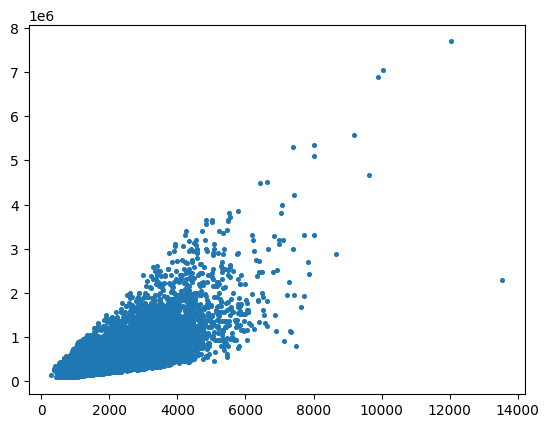

In [60]:
#a)
#Your code:

sqft_living = df['sqft_living']
price = df['price']

plt.scatter(sqft_living, price, s=7)
plt.show()
#Hint plt.scatter

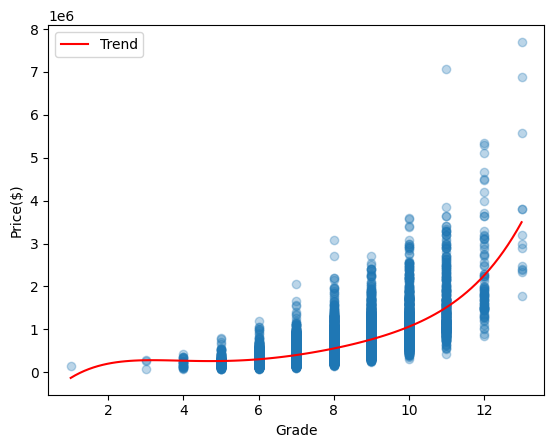

In [55]:
#b)
#Your code:

grades = df['grade']
plt.scatter(grades, price, alpha=0.3)

#I want do add trend line for this plot to show price change trend 
coefficients = np.polyfit(grades, price, 5)
polynomial = np.poly1d(coefficients)
x_line = np.linspace(min(grades), max(grades), 100)
plt.plot(x_line, polynomial(x_line), color='red', label='Trend')
plt.xlabel('Grade')
plt.ylabel('Price($)')
plt.legend()
plt.show()

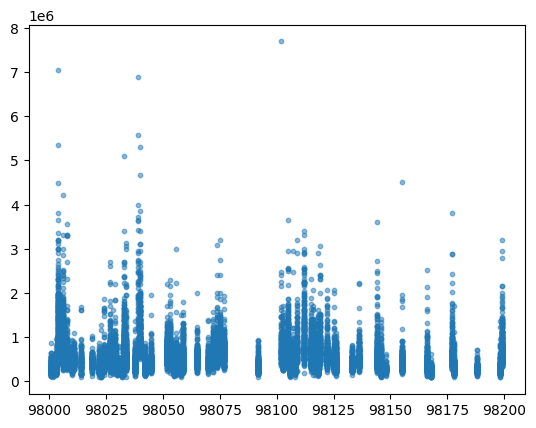

In [56]:
#c)
#Your code:
zipcode = df['zipcode']
plt.scatter(zipcode, price, alpha=0.5, s=10)
plt.show()

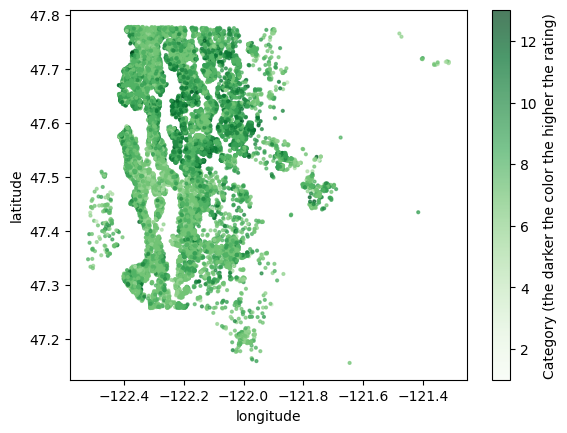

In [57]:
#Your code:

x_line = df['long']
y_line = df['lat']
plt.scatter(x_line, y_line, c=grades, cmap='Greens', alpha=0.7, s=4)
plt.colorbar(label='Category (the darker the color the higher the rating)')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

## Exercise 3
a) Create boxplot of apartment's grade versus it's price. Compare with plot 2b).  
b) Create mosaic plot of any two categorical variables.

C:\Users\Maxym\AppData\Local\Temp\ipykernel_17828\2842287144.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(prices_by_grade, labels=sorted(df['grade'].unique()), patch_artist=True)


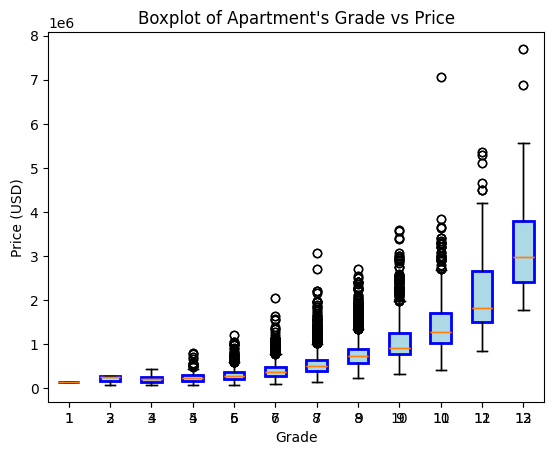

In [68]:
#a)
#Your code:
grades = sorted(df['grade'].unique())
prices_by_grade = [df[df['grade'] == grade]['price'] for grade in grades]

plt.boxplot(prices_by_grade, labels=sorted(df['grade'].unique()), patch_artist=True)


for box in plt.boxplot(prices_by_grade, patch_artist=True)['boxes']:
    box.set(color='blue', linewidth=2)
    box.set(facecolor='lightblue')

plt.title("Boxplot of Apartment's Grade vs Price")
plt.xlabel('Grade')
plt.ylabel('Price (USD)')

plt.show()

#Hint: plt.boxplot

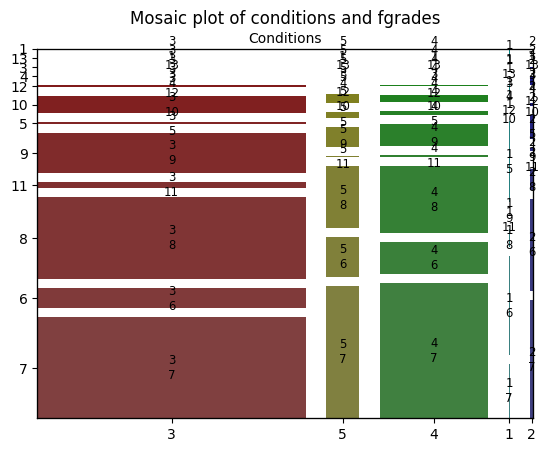

In [108]:
#b)
from statsmodels.graphics.mosaicplot import mosaic

#Your code:

data = pd.DataFrame({'conditions': df['condition'], 'grades': df['grade']})

mosaic(data, ['conditions', 'grades'], gap=0.05)

plt.title('Mosaic plot of conditions and fgrades')
plt.xlabel('Conditions')
plt.ylabel('Grades')

plt.show()

## Exercise 4
"I am interested in the house with 3 bedrooms, 2 bathrooms and 2 floors"  
a) Compute the basic statistics of apartments fulfilling above constraints.  
b) Distinct accepted apartments on any of previously created plots.  
c) Find such apartments with best price to footage ratio.  

In [93]:
#a)
#Your code:
filtered_df = df.loc[(df['bedrooms'] == 3) & (df['bathrooms'] == 2) & (df['floors'] == 2)]
filtered_numerical_df = filtered_df[numerical_columns]
filtered_basic_statistics = {}

for col in filtered_numerical_df.columns:
    filtered_basic_statistics[col] = {
        'mean': filtered_numerical_df[col].mean(),
        'std': filtered_numerical_df[col].std(),
        'min': filtered_numerical_df[col].min(),
        'max': filtered_numerical_df[col].max(), 
        'sum': filtered_numerical_df[col].sum(),
    }
filtered_basic_statistics_df = pd.DataFrame(filtered_basic_statistics).T
print(filtered_basic_statistics_df)
#Hint: pandas.DataFrame.loc

                       mean           std           min           max  \
id             4.397177e+09  2.849813e+09  7.600057e+06  9.829200e+09   
price          5.144986e+05  2.497661e+05  2.090000e+05  1.755000e+06   
bedrooms       3.000000e+00  0.000000e+00  3.000000e+00  3.000000e+00   
bathrooms      2.000000e+00  0.000000e+00  2.000000e+00  2.000000e+00   
sqft_living    1.850279e+03  5.475854e+02  1.020000e+03  3.650000e+03   
sqft_lot       2.367895e+04  8.332402e+04  7.000000e+02  8.433090e+05   
floors         2.000000e+00  0.000000e+00  2.000000e+00  2.000000e+00   
sqft_above     1.717422e+03  5.274739e+02  7.200000e+02  3.650000e+03   
sqft_basement  1.328571e+02  2.480926e+02  0.000000e+00  1.120000e+03   
yr_built       1.969779e+03  3.465446e+01  1.900000e+03  2.014000e+03   
yr_renovated   2.848636e+02  7.000573e+02  0.000000e+00  2.014000e+03   
lat            4.756738e+01  1.432215e-01  4.719470e+01  4.777700e+01   
long          -1.222471e+02  1.505068e-01 -1.225190

C:\Users\Maxym\AppData\Local\Temp\ipykernel_17828\328798437.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


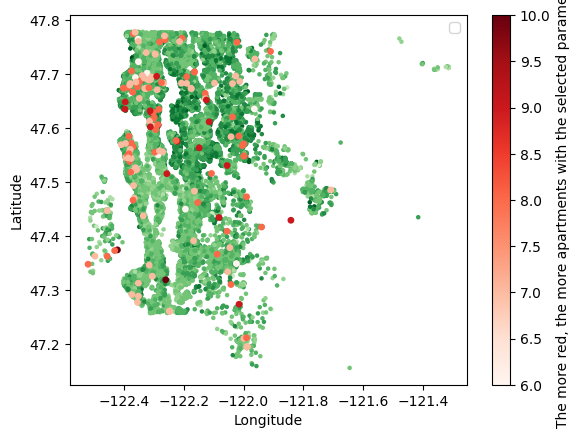

In [137]:
#b)
#Your code:
x_line = df['long']
y_line = df['lat']
grades = df['grade']

plt.scatter(x_line, y_line, c=grades, cmap='Greens', alpha=1, s=5)
x_filtered = filtered_df['long']
y_filtered = filtered_df['lat']
filtered_grades = filtered_df['grade']
plt.scatter(x_filtered, y_filtered, c=filtered_grades, cmap='Reds', alpha=1, s=15)

plt.colorbar(label='The more red, the more apartments with the selected parameter.')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend()
plt.show()

----------------------------BEST PRICE TO FOOTAGE RATIO------------------------------------
               id     price  sqft_living  price_to_footage_ratio     long  \
9704   7452500565  260000.0         2710               95.940959 -122.373   
11258  7937600262  379900.0         3110              122.154341 -122.082   
19880  3832050860  210000.0         1580              132.911392 -122.053   
16014  5104450440  252500.0         1810              139.502762 -122.153   
20906  3355400242  274900.0         1936              141.993802 -122.246   

           lat  
9704   47.5188  
11258  47.4343  
19880  47.3338  
16014  47.4619  
20906  47.2602  
---------------------------------GENERAL INFORMATION------------------------------------
               id             date     price  bedrooms  bathrooms  \
9704   7452500565  20140829T000000  260000.0         3        2.0   
11258  7937600262  20140710T000000  379900.0         3        2.0   
19880  3832050860  20150319T000000  210000.0   

C:\Users\Maxym\AppData\Local\Temp\ipykernel_17828\38828753.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


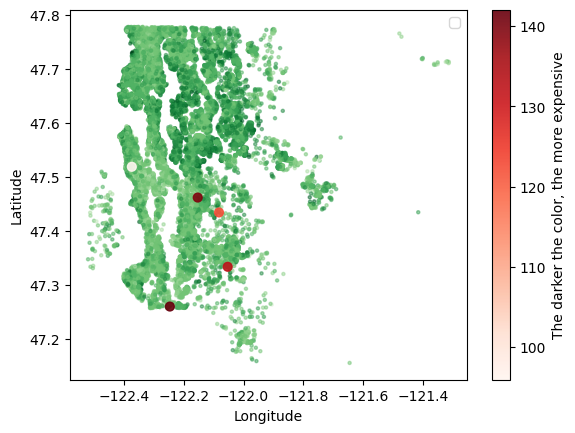

In [142]:
#c)
#Your code:
df['price_to_footage_ratio'] = df['price'] / df['sqft_living']
filtered_df = df.loc[(df['bedrooms'] == 3) & (df['bathrooms'] == 2) & (df['floors'] == 2)]
sorted_df = filtered_df.sort_values(by='price_to_footage_ratio', ascending=True)
print("----------------------------BEST PRICE TO FOOTAGE RATIO------------------------------------")
best_price_to_footage = sorted_df[['id', 'price', 'sqft_living', 'price_to_footage_ratio', 'long', 'lat']].head(5)
print(best_price_to_footage)
print("---------------------------------GENERAL INFORMATION------------------------------------")
best_price_to_footage = sorted_df.head(5)
print(best_price_to_footage)

print("-----------------------------------------PLOT----------------------------------------")
x_line = df['long']
y_line = df['lat']
grades = df['grade']

plt.scatter(x_line, y_line, c=grades, cmap='Greens', alpha=0.5, s=5)

x_best = best_price_to_footage['long']
y_best = best_price_to_footage['lat']
best_ratio = best_price_to_footage['price_to_footage_ratio']
plt.scatter(x_best, y_best, c=best_ratio, cmap='Reds', alpha=0.9, s=40)

plt.colorbar(label='The darker the color, the more expensive')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend()
plt.show()

#Hint: .loc, .sort_values(), .index